In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
from prophet import Prophet

In [ ]:
df= pd.read_csv( "/content/FSI.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5606 non-null   object 
 1   FSI         5606 non-null   float64
 2   LAG1        5606 non-null   float64
 3   LAG2        5606 non-null   float64
 4   LAG3        5606 non-null   float64
 5   MA5         5606 non-null   float64
 6   MA10        5606 non-null   float64
 7   Unnamed: 7  5606 non-null   float64
 8   US          5606 non-null   float64
 9   OAE         5606 non-null   float64
 10  EM          5606 non-null   float64
dtypes: float64(10), object(1)
memory usage: 481.9+ KB


In [ ]:
df['DateTime']=pd.to_datetime(df['Date'])

In [ ]:
df1 = df.dropna()
df1.shape

(5606, 12)

In [ ]:
split_date ='2018-10-09'
df_training = df1.loc[df['DateTime'] <= split_date]
df_test = df1.loc[df['DateTime'] > split_date]

In [ ]:
df_training = df_training.rename(columns={'DateTime': 'ds','FSI': 'y'})

In [ ]:
m = Prophet(growth='linear', interval_width=0.95)
m = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m.add_seasonality(name='daily', period=1, fourier_order=8)

In [ ]:
m.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4o1ah_1/465bog_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4o1ah_1/pxto09g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82104', 'data', 'file=/tmp/tmpa4o1ah_1/465bog_z.json', 'init=/tmp/tmpa4o1ah_1/pxto09g8.json', 'output', 'file=/tmp/tmpa4o1ah_1/prophet_modelxyt3a9cj/prophet_model-20231117040837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4711,2018-10-03,-2.408552,-4.184773,-0.729319
4712,2018-10-04,-2.377573,-4.065327,-0.524352
4713,2018-10-05,-2.366415,-4.362089,-0.638352
4714,2018-10-08,-2.298647,-4.121657,-0.340988
4715,2018-10-09,-2.307842,-4.288317,-0.540106


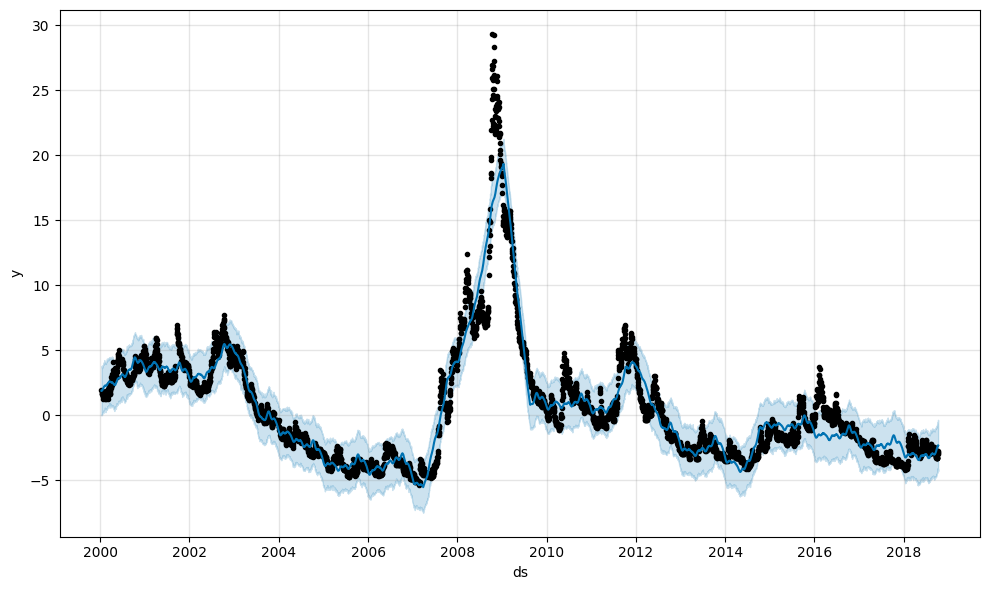

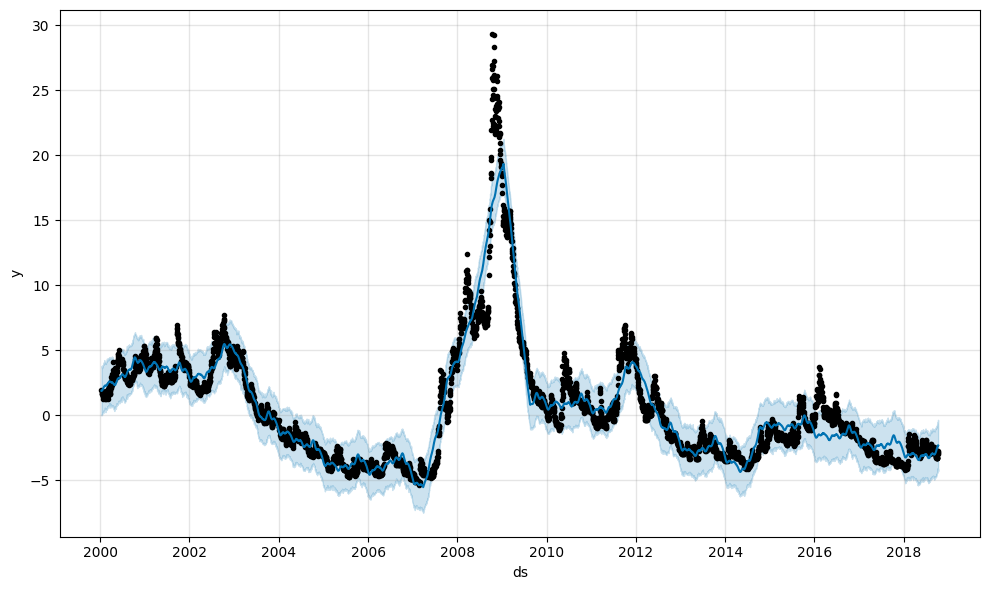

In [ ]:
m.plot(forecast)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.95076416


The Pearson correlation coefficient is used here to measure the linear relationship between the predicted values (yhat) generated by the Prophet model and the actual observed values (y).

A value close to 1 (or -1) indicates a strong positive (or negative) linear relationship, meaning the model's predictions align very well with the actual data.
A value close to 0 suggests a weak or no linear relationship.
In this notebook, it's used to assess how well the forecast tracks the actual data, both on the training set and the test set.

In [ ]:
df_test = df_test.rename(columns={'DateTime': 'ds','FSI': 'y'})

In [ ]:
forecast2 = m.predict(df_test.drop(columns="y"))

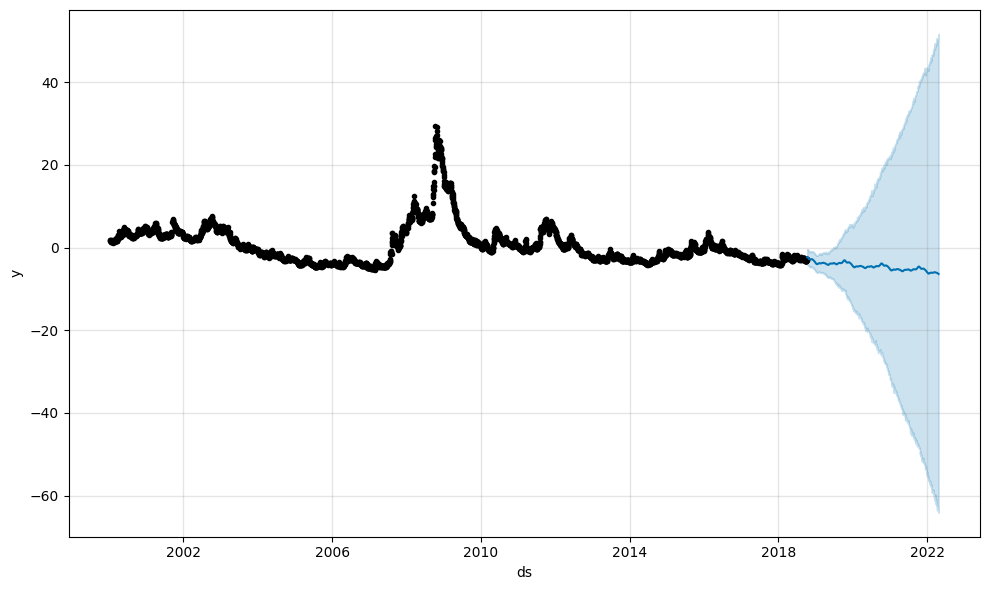

In [ ]:
fig=m.plot(forecast2)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.03034489


In [ ]:
df_training["add1"] = df1['LAG1']
df_training["add2"]= df1['LAG2']
df_training["add3"]= df1['LAG3']
df_training["add4"]=df1['MA5']
df_training["add5"]=df1['MA10']
df_training["add6"]= df1['US']
df_training["add7"]=df1['OAE']
df_training["add8"]=df1['EM']

In [ ]:
m2 = Prophet(growth='linear', interval_width=0.95)
m2 = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m2.add_seasonality(name='daily', period=1, fourier_order=8)
m2.add_regressor('add1')
m2.add_regressor('add2')
m2.add_regressor('add3')
m2.add_regressor('add4')
m2.add_regressor('add5')
m2.add_regressor('add6')
m2.add_regressor('add7')
m2.add_regressor('add8')

In [ ]:
m2.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4o1ah_1/g3wbi6pa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4o1ah_1/q3mof1fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31172', 'data', 'file=/tmp/tmpa4o1ah_1/g3wbi6pa.json', 'init=/tmp/tmpa4o1ah_1/q3mof1fi.json', 'output', 'file=/tmp/tmpa4o1ah_1/prophet_modele7u5g3jo/prophet_model-20231117040151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:02:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m2.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4711,2018-10-03,-3.284286,-3.297928,-3.271394
4712,2018-10-04,-2.946221,-2.959710,-2.933058
4713,2018-10-05,-2.887259,-2.899527,-2.875142
4714,2018-10-08,-2.800401,-2.813954,-2.789160
4715,2018-10-09,-2.755334,-2.769038,-2.742935


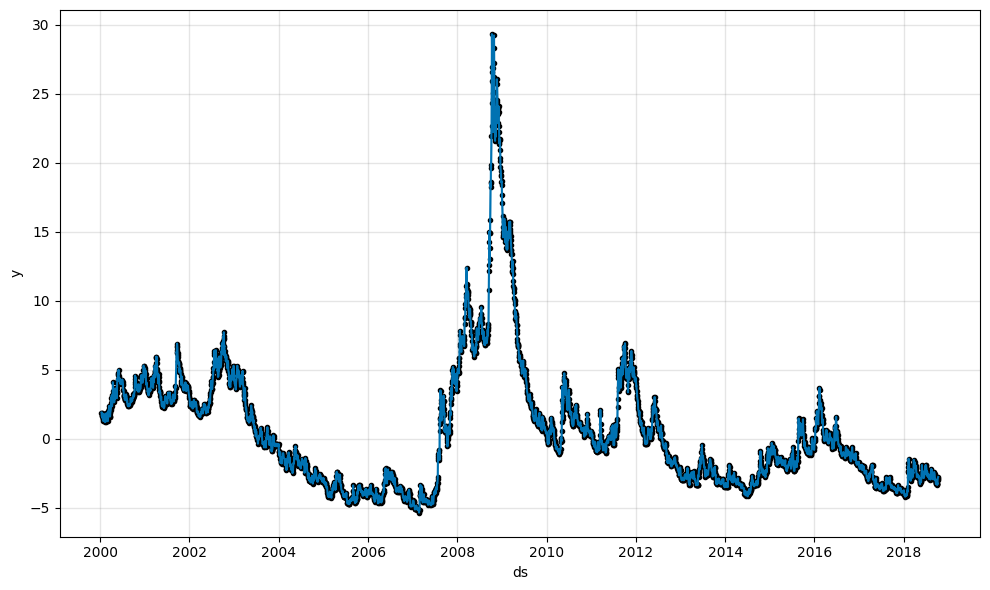

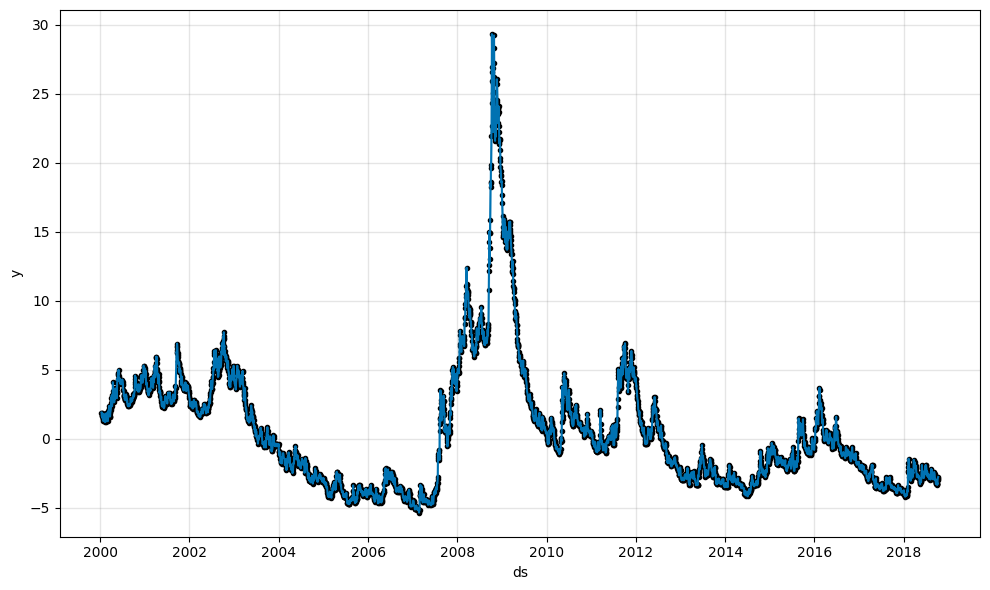

In [ ]:
m2.plot(forecast)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.99999999


In [ ]:
df_test["add1"] = df1['LAG1']
df_test["add2"]= df1['LAG2']
df_test["add3"]= df1['LAG3']
df_test["add4"]=df1['MA5']
df_test["add5"]=df1['MA10']
df_test["add6"]= df1['US']
df_test["add7"]=df1['OAE']
df_test["add8"]=df1['EM']

In [ ]:
forecast2 = m2.predict(df_test.drop(columns="y"))

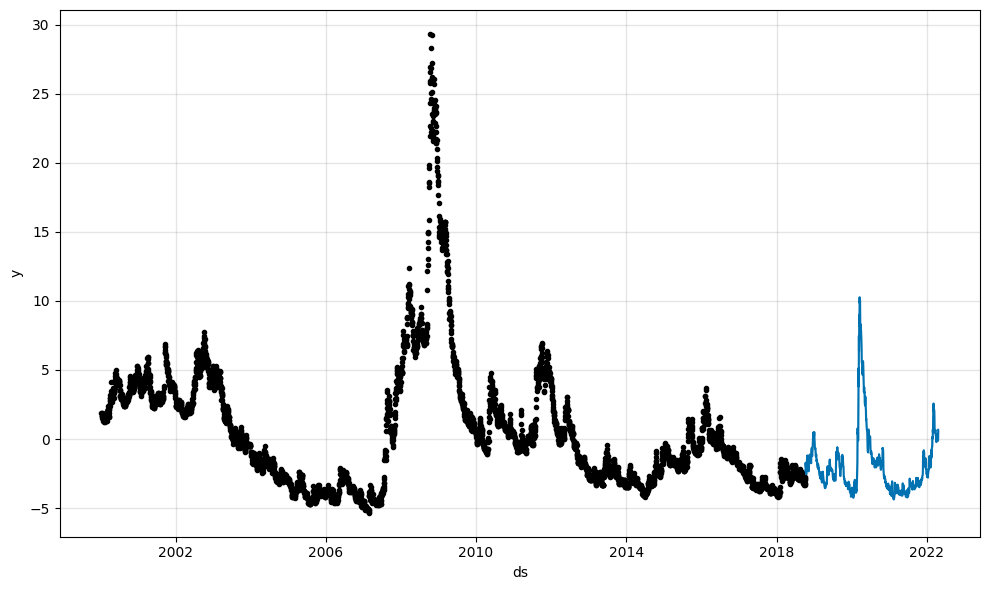

In [ ]:
fig=m2.plot(forecast2)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.99999879


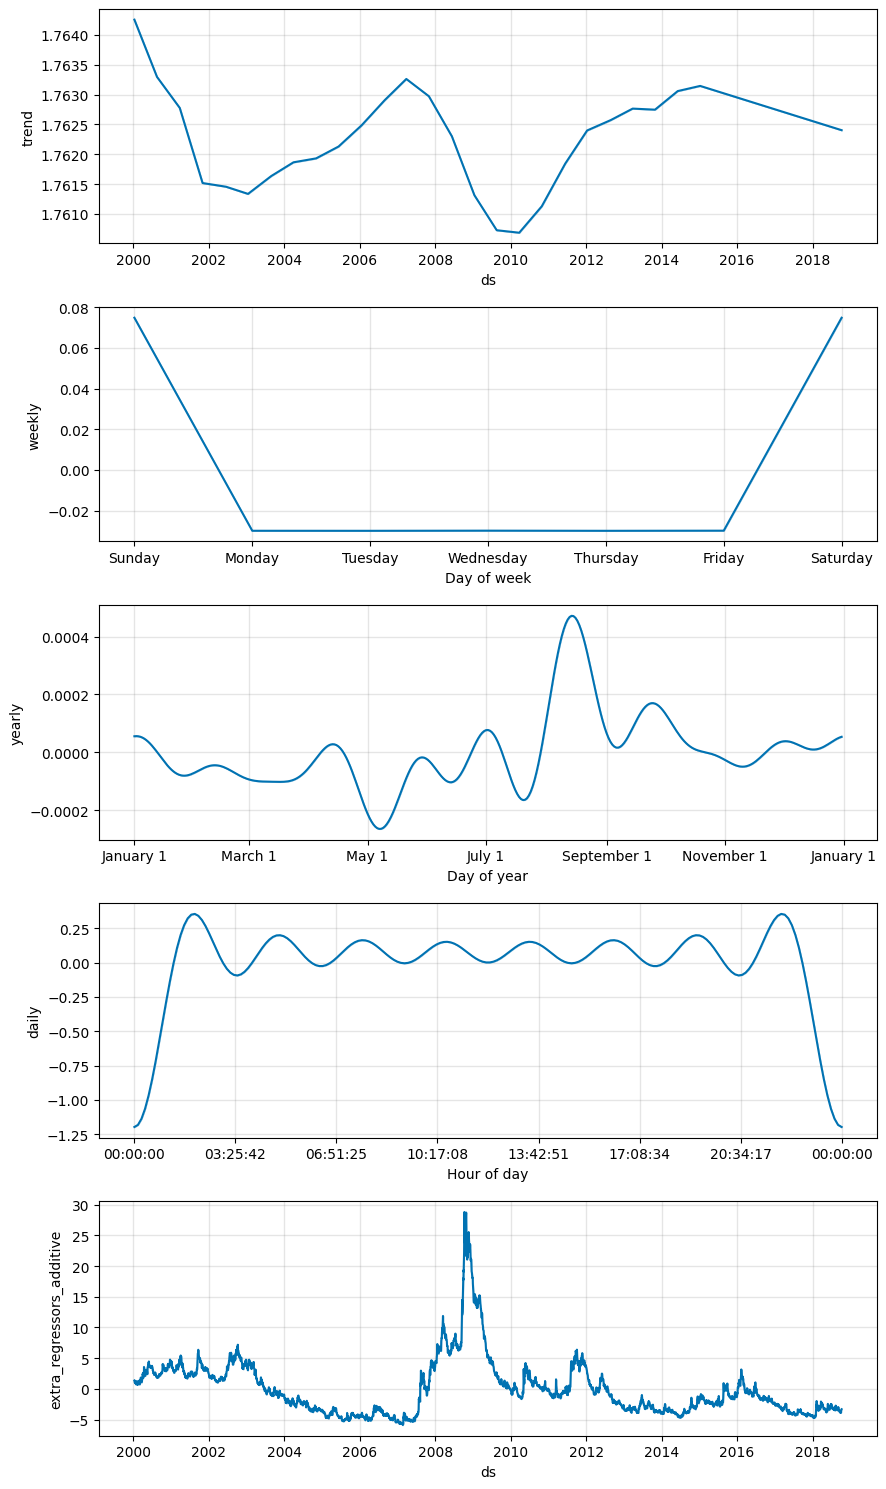

In [ ]:
fig2 = m2.plot_components(forecast)

In [ ]:
g2=pd.DataFrame(forecast2[['yhat']])
g2.to_csv('C:\\Users\\Document\\Predictions2367.csv')

In [ ]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['y'], forecast2['yhat'])
print("Mean Square Error:\n")
print(mse)
rsme = math.sqrt(mse)
print("\nRoot Mean Square Error:\n")
print(rsme)
corr_matrix = np.corrcoef(df_test['y'], forecast2['yhat'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n R Square:\n")
print(R_sq)

Mean Square Error:

1.3688754477996956e-05

Root Mean Square Error:

0.0036998316823873157

 R Square:

0.9999975804652921
